### Problem 3 Code & Results (Parts b - d)

Note: My code/solution (below) is also provided in "$\texttt{meanvariance.ipynb}$"  notebook. However, I put it in this separate notebook so that my code and results are separate from the professor's code. The "$\texttt{meanvariance.ipynb}$" notebook contains a lot of the professor's work in the beginning, it could cause confusion.

In [1]:
import numpy as np
import scipy.io as sio
import cvxpy as cvx
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
mat_contents = sio.loadmat('meanvariance.mat')
mu = mat_contents['mu']
S = np.matrix(mat_contents['S'])
d = np.size(mu)

###### Part b

In [3]:
J = np.ones((len(S),1))    # d x 1 ones vector
S_inv = np.linalg.inv(S)   # inverse of covariance matrix

In [4]:
x_numerator = np.matmul(S_inv, J)     # numerator of the optimal solution
JS_inv = J.T*S_inv
x_denominator = np.matmul(JS_inv, J)  # denominator of the optimal solution

x_min = x_numerator/x_denominator     # optimal solution (min variance portfolio)
r_min = np.dot(mu.T, x_min).item(0)   # minimum expected return

In [5]:
opt_val = x_min.T*S*x_min           # minimum variance (i.e. optimal objective value)

sigma2_min = opt_val.item(0)        # extracts the scalar value from the 1x1 matrix

In [6]:
print('Minimum Variance (opt value):  ', sigma2_min)
print('\nMinimum Return (r_min):  ', r_min)
#print('\nMinimum Variance Portfolio x (optimal solution):\n\n', x_min)

Minimum Variance (opt value):   5.850607343853076e-11

Minimum Return (r_min):   0.05152761072308839


###### Part c

Want to solve the following system of equations for $x$ and $u$ (critical values)

$$
\underbrace{\begin{bmatrix}
\begin{bmatrix} \mu^\top \\ \mathbf{1}^\top \end{bmatrix}  & \mathbf{0}\\
2S & \begin{bmatrix} \mu & \mathbf{1} \end{bmatrix} 
\end{bmatrix}}_{M}
\underbrace{\begin{bmatrix}
x \\ u
\end{bmatrix}}_{z}
= \underbrace{\begin{bmatrix}
\begin{bmatrix} 1.1r_{min} \\ 1 \end{bmatrix} \\
0
\end{bmatrix}}_{q}
$$

In [7]:
M11 = np.concatenate((mu.T, J.T),axis=0)
M12 = np.zeros((len(M11),len(M11)))
M21 = 2*S
M22 = np.concatenate((mu, J),axis=1)

M1 = np.concatenate((M11, M12), axis=1)
M2 = np.concatenate((M21, M22),axis=1)
M = np.concatenate((M1,M2),axis=0)

b = np.array([[1.1*r_min], [1]])
q = np.concatenate((b, np.zeros((len(S),1))), axis=0)

In [8]:
z = np.linalg.solve(M,q)
x_opt = z[0:d]

Alternative approach to solving for $x^*$ (Determined using the lecture notes on the optimal solution to equality constrained QPs) 

$x^* = S^{-1}\begin{bmatrix} \mu & \mathbf{1} \end{bmatrix} 
\left(\begin{bmatrix} \mu^\top \\ \mathbf{1}^\top \end{bmatrix} S^{-1}
\begin{bmatrix} \mu & \mathbf{1} \end{bmatrix}\right)^{-1}
\begin{bmatrix} 1.1r_{min} \\ 1 \end{bmatrix}$

In [9]:
# Computes the expression above for optimal x (primal critical values using gradient condition)

x_left = S_inv*M22
x_mid = np.linalg.inv(M11*S_inv*M22)
x_right = b

x_optimal = x_left*x_mid*x_right

In [10]:
alpha1 = r_min
alpha2 = np.dot(mu.T, x_opt).item(0)

sigma2 = np.zeros(len(S)) 
r = np.zeros(len(S))
alpha = r_min

for i in range(len(S)):
    weight = (alpha2-alpha)/(alpha2-alpha1)
    phi = weight*x_min + (1-weight)*x_opt
    #eff = np.concatenate((eff, phi), axis=1)
    sigma2[i] = phi.T*S*phi
    r[i] = alpha
    alpha += 0.0001

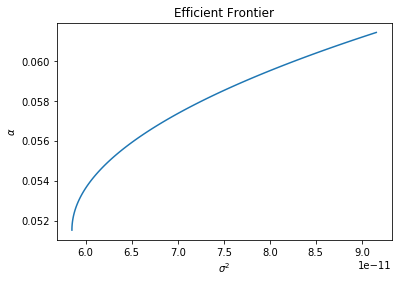

In [11]:
plt.title('Efficient Frontier')
plt.xlabel(r'$\sigma^2$')
plt.ylabel(r'$\alpha$')
plt.plot(sigma2, r)
plt.show()

###### Part d - Sharpe optimal portfolio

In [12]:
r_f = 0.04               #risk-free rate

J = np.ones((len(mu),1)) # d x 1 ones vector 
mu_ex = mu - r_f*J       # vector of expected excess returns

x_num = S_inv*mu_ex     
x_den = mu_ex.T*S_inv*mu_ex

x_star = x_num/x_den     # Optimal solution 

x_sh = x_star/np.dot(J.T, x_star).item(0)    # Sharpe optimal portfolio

In [13]:
opt_variance = x_sh.T*S*x_sh      # variance on optimal Sharpe portfolio
ex_return = mu_ex.T*x_sh          # excess return on optimal Sharpe portfolio
sharpe_ratio = ex_return/np.sqrt(opt_variance)

print('Optimal Sharpe portfolio statistics:')
print('\nVariance:       ', opt_variance.item(0))  
print('\nExcess Return:  ', ex_return.item(0)) 
print('\nSharpe Ratio:   ', sharpe_ratio.item(0))

Optimal Sharpe portfolio statistics:

Variance:        1.3485956836610517e-10

Excess Return:   0.026571747427911182

Sharpe Ratio:    2288.1222961738217
